In [2]:
#initial setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

#import API key
from api_keys import weather_api_key

#add citipy to determine lat and long
from citipy import citipy

#output file (CSV)
output_data_file = "output_data/cities.csv"

#range of lat and long
lat_cities = (-90, 90)
lng_cities = (-180, 180)

# Generate Cities List

In [5]:
#list for holding lat and long and cities
lat_lng = []
cities = []

#create random list
lats = np.random.uniform(lat_cities[0], lat_cities[1], size = 1500)
longs = np.random.uniform(lng_cities[0], lng_cities[1], size = 1500)
lat_lng = zip(lats, longs)

#identify closest city for each combination
for lat_lng in lat_lng:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    #if the city is unique then add to cities list
    if city not in cities:
        cities.append(city)
#print citiy count
len(cities)

602

In [4]:
cities

['saleaula',
 'dunedin',
 'san patricio',
 'bajo baudo',
 'chuy',
 'bathsheba',
 'cape town',
 'camana',
 'hovd',
 'hobart',
 'tuktoyaktuk',
 'andevoranto',
 'mataura',
 'punta arenas',
 'saskylakh',
 'tonota',
 'dikson',
 'bredasdorp',
 'upernavik',
 'hermanus',
 'kenai',
 'rikitea',
 'makakilo city',
 'ponta do sol',
 'taolanaro',
 'chokurdakh',
 'vostok',
 'bethel',
 'tasiilaq',
 'barrow',
 'illoqqortoormiut',
 'aksu',
 'new norfolk',
 'nikolskoye',
 'kodiak',
 'rio grande',
 'ketchikan',
 'cozumel',
 'fare',
 'khislavichi',
 'ramgarh',
 'macamic',
 'bengkulu',
 'vaitupu',
 'usinsk',
 'thompson',
 'la paz',
 'nanortalik',
 'nome',
 'airai',
 'puerto ayora',
 'ribeira grande',
 'narsaq',
 'margate',
 'lompoc',
 'kununurra',
 'barentsburg',
 'coihaique',
 'ndiekro',
 'grand river south east',
 'qaanaaq',
 'tasbuget',
 'sakaraha',
 'necochea',
 'rawson',
 'los banos',
 'tuatapere',
 'grindavik',
 'shache',
 'carnarvon',
 'itapicuru',
 'hilo',
 'victoria',
 'asau',
 'portland',
 'milton

# API Calls 

In [4]:
# url = "https://api.openweathermap.org/data/2.5/weather?&units=Imperial"
# # units = "Imperial"
# city= "Carnarvon"
# city_url = url+"&APPID="+weather_api_key+"&q="+city

#  #create url for each city
# # city_url = f"{url}&q={city}"

# city_weather = requests.get(city_url).json()
# # city_weather
        
# #add a time delay to avoid oversing the API key
# # time.sleep(2)

# # max temp, humidity, and cloudiness 
# city_lat = city_weather["coord"]["lat"]
# city_long = city_weather["coord"]["lon"]
# city_max_temp = city_weather["main"]["temp_max"]
# city_humidity = city_weather["main"]["humidity"]
# city_clouds = city_weather["clouds"]["all"]
# city_wind = city_weather["wind"]["speed"]
# city_country = city_weather["sys"]["country"]
# city_date = city_weather["dt"]
# print(city.title(),city_lat, city_long, city_max_temp, city_humidity, city_clouds, city_wind, city_country, city_date)

Carnarvon -24.8667 -24.8667 62.67 100 100 18.41 AU 1659113901


In [6]:
url = "https://api.openweathermap.org/data/2.5/weather?&units=Imperial&APPID="+weather_api_key

In [9]:
#print to log
print("Data Retrieval")
print("---------------")

# url = "https://api.openweathermap.org/data/2.5/weather?&units=Imperial&APPID="+weather_api_key

# url = "https://api.openweathermap.org/data/2.5/weather?"
# units = "Imperial"

# query_url = f"{url}&APPID={weather_api_key}&units={units}&q="

#list of cities
city_data =[]

#create counters
record_count = 1
set_count = 1

#loop through all cities in our list
for i, city in enumerate(cities):
    if(i % 50 == 0 and i>= 50):
        set_count +=1
        record_count = 1
        time.sleep(2)
    #create url for each city
    city_url = url+"&q="+city
#     city_url = f"{url}&q={city}"
    
    #log the record and the set number
    print(f"Processing city #{record_count} in group #{set_count} | {city}")
    record_count += 1
    
    try:
        city_weather = requests.get(city_url).json()

        #add a time delay to avoid oversing the API key


        #max temp, humidity, and cloudiness 
        city_lat = city_weather["coord"]["lat"]
        city_long = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        #append the city info into city_data list
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lon":city_long,
                         "Max Tem":city_max_temp,
                         "Humidity":city_humidity,
                         "Cloudiness":city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
    except:
        #if errors occur, skip the city
        print(f"{city} has an error. Skipping...")
        pass
#indicate that data loading is complete
print("Data Retrieval Complete")
    

Data Retrieval
---------------
Processing city #1 in group #1 | albany
Processing city #2 in group #1 | puyo
Processing city #3 in group #1 | ruzomberok
Processing city #4 in group #1 | vuktyl
Processing city #5 in group #1 | busselton
Processing city #6 in group #1 | ponta do sol
Processing city #7 in group #1 | punta arenas
Processing city #8 in group #1 | saldanha
Processing city #9 in group #1 | kapaa
Processing city #10 in group #1 | san patricio
Processing city #11 in group #1 | saint-philippe
Processing city #12 in group #1 | belushya guba
belushya guba has an error. Skipping...
Processing city #13 in group #1 | vila velha
Processing city #14 in group #1 | rikitea
Processing city #15 in group #1 | castro
Processing city #16 in group #1 | illoqqortoormiut
illoqqortoormiut has an error. Skipping...
Processing city #17 in group #1 | hobart
Processing city #18 in group #1 | guryevsk
Processing city #19 in group #1 | hammerfest
Processing city #20 in group #1 | tuktoyaktuk
Processing

Processing city #29 in group #4 | narsaq
Processing city #30 in group #4 | barcelos
Processing city #31 in group #4 | havre-saint-pierre
Processing city #32 in group #4 | attawapiskat
attawapiskat has an error. Skipping...
Processing city #33 in group #4 | batagay-alyta
Processing city #34 in group #4 | pisco
Processing city #35 in group #4 | bathsheba
Processing city #36 in group #4 | werda
Processing city #37 in group #4 | new norfolk
Processing city #38 in group #4 | launceston
Processing city #39 in group #4 | cherskiy
Processing city #40 in group #4 | fort-shevchenko
Processing city #41 in group #4 | kahului
Processing city #42 in group #4 | richards bay
Processing city #43 in group #4 | san quintin
Processing city #44 in group #4 | labytnangi
Processing city #45 in group #4 | batesville
Processing city #46 in group #4 | manzil salim
Processing city #47 in group #4 | big spring
Processing city #48 in group #4 | banting
Processing city #49 in group #4 | jais
Processing city #50 in 

Processing city #9 in group #8 | coquimbo
Processing city #10 in group #8 | louisbourg
louisbourg has an error. Skipping...
Processing city #11 in group #8 | bengkulu
Processing city #12 in group #8 | yulara
Processing city #13 in group #8 | shimoda
Processing city #14 in group #8 | ahipara
Processing city #15 in group #8 | maple creek
Processing city #16 in group #8 | teguldet
Processing city #17 in group #8 | emerald
Processing city #18 in group #8 | vila
Processing city #19 in group #8 | half moon bay
Processing city #20 in group #8 | fayaoue
Processing city #21 in group #8 | donskoye
Processing city #22 in group #8 | qaqortoq
Processing city #23 in group #8 | pangnirtung
Processing city #24 in group #8 | grand river south east
grand river south east has an error. Skipping...
Processing city #25 in group #8 | jardim
Processing city #26 in group #8 | freeport
Processing city #27 in group #8 | colombo
Processing city #28 in group #8 | tank
Processing city #29 in group #8 | pangoa
Proc

Processing city #32 in group #11 | waitara
Processing city #33 in group #11 | rocha
Processing city #34 in group #11 | itarema
Processing city #35 in group #11 | jiaocheng
Processing city #36 in group #11 | marienburg
Processing city #37 in group #11 | frankfort
Processing city #38 in group #11 | bokspits
bokspits has an error. Skipping...
Processing city #39 in group #11 | sola
Processing city #40 in group #11 | sogdiondon
sogdiondon has an error. Skipping...
Processing city #41 in group #11 | kamenka
Processing city #42 in group #11 | sangmelima
Processing city #43 in group #11 | cleethorpes
Processing city #44 in group #11 | avera
Processing city #45 in group #11 | osvaldo cruz
Processing city #46 in group #11 | tsihombe
tsihombe has an error. Skipping...
Processing city #47 in group #11 | rundu
Processing city #48 in group #11 | conceicao da barra
Processing city #49 in group #11 | nara
Processing city #50 in group #11 | wasco
Processing city #1 in group #12 | eirunepe
Processing c

# Convert Raw Data to DataFrame

In [54]:
city_data_pd = pd.DataFrame(city_data)
city_data_pd.head()

,City,Lat,Lon,Max Tem,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,74.26,66,2,4.21,US,1659532511
1,Puyo,-1.4667,-77.9833,67.24,94,75,0.00,EC,1659532605
2,Ruzomberok,49.0748,19.3075,81.00,29,6,3.76,SK,1659532494
3,Vuktyl,63.8567,57.3094,79.23,34,6,9.31,RU,1659532606
4,Busselton,-33.6500,115.3333,54.32,73,100,17.74,AU,1659532606


In [55]:
city_data_pd.to_csv("city_weather_data.csv", index=False)

In [56]:
city_data_pd=pd.read_csv("city_weather_data.csv")
city_data_pd.head()

,City,Lat,Lon,Max Tem,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,74.26,66,2,4.21,US,1659532511
1,Puyo,-1.4667,-77.9833,67.24,94,75,0.00,EC,1659532605
2,Ruzomberok,49.0748,19.3075,81.00,29,6,3.76,SK,1659532494
3,Vuktyl,63.8567,57.3094,79.23,34,6,9.31,RU,1659532606
4,Busselton,-33.6500,115.3333,54.32,73,100,17.74,AU,1659532606


In [23]:
city_data_pd.describe()

,Lat,Lon,Max Tem,Humidity,Cloudiness,Wind Speed,Date
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,5.490000e+02
mean,19.857970,20.651260,72.061129,68.313297,51.754098,8.073698,1.659533e+09
std,34.206284,90.524705,14.545173,22.483900,40.454846,5.464374,8.753005e+01
min,-54.800000,-175.200000,31.950000,1.000000,0.000000,0.000000,1.659532e+09
25%,-8.926600,-56.154900,61.180000,55.000000,7.000000,4.030000,1.659533e+09
50%,26.203900,24.927500,75.090000,73.000000,52.000000,6.910000,1.659533e+09
75%,48.800200,99.184400,81.520000,87.000000,99.000000,11.050000,1.659533e+09
max,78.218600,179.316700,112.840000,100.000000,100.000000,33.330000,1.659533e+09


# Inspect the data and remove the cities with >100% humidity

In [24]:
dirty_city_data = city_data_pd[(city_data_pd["Humidity"]>100)].index

print(dirty_city_data)

Int64Index([], dtype='int64')


In [25]:
#clean data set by removing cities 
clean_city_data = city_data_pd.drop(dirty_city_data, inplace=False)
clean_city_data.head()

,City,Lat,Lon,Max Tem,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,74.26,66,2,4.21,US,1659532511
1,Puyo,-1.4667,-77.9833,67.24,94,75,0.00,EC,1659532605
2,Ruzomberok,49.0748,19.3075,81.00,29,6,3.76,SK,1659532494
3,Vuktyl,63.8567,57.3094,79.23,34,6,9.31,RU,1659532606
4,Busselton,-33.6500,115.3333,54.32,73,100,17.74,AU,1659532606


In [26]:
#extract required info
lats = clean_city_data["Lat"]
max_temps = clean_city_data["Max Tem"]
humidity = clean_city_data["Humidity"]
cloudiness = clean_city_data["Cloudiness"]
wind_speed = clean_city_data["Wind Speed"]

#export city data into a csv
clean_city_data.to_csv(output_data_file, index_label="City_ID")

# Plotting the Data

# Latitude vs. Temperature Plot

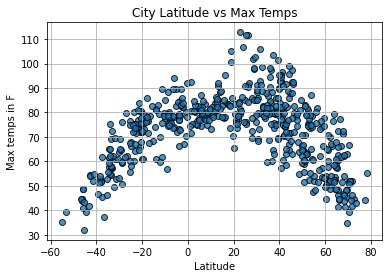

In [27]:
plt.scatter(lats, max_temps, edgecolor = "black", linewidths=1, marker="o", alpha=0.8, label="Cities")
#add graph properties
plt.title("City Latitude vs Max Temps")
plt.ylabel("Max temps in F")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

# Latitude vs. Humidity Plot

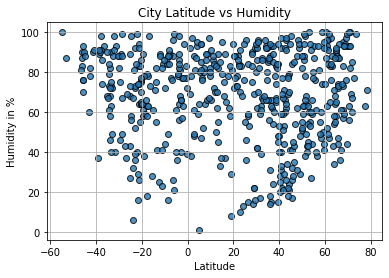

In [28]:
plt.scatter(lats, humidity, edgecolor = "black", linewidths=1, marker="o", alpha=0.8, label="Cities")
#add graph properties
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity in %")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()

# Latitude vs Cloudiness Plot

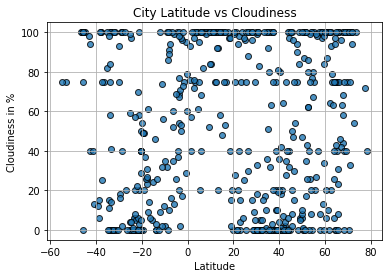

In [29]:
plt.scatter(lats, cloudiness, edgecolor = "black", linewidths=1, marker="o", alpha=0.8, label="Cities")
#add graph properties
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness in %")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()

# Latitude vs. Wind Speed Plot

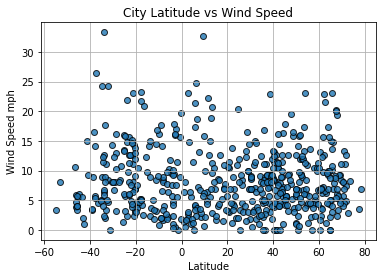

In [30]:
plt.scatter(lats, wind_speed, edgecolor = "black", linewidths=1, marker="o", alpha=0.8, label="Cities")
#add graph properties
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed mph")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()

# Linear Regression

In [31]:
#create a function to create linear regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
   #run a regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y - "+ str(round(slope,2))+ "x +"+ str(round(intercept,2))
    
    #plot
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is:{rvalue**2}")
    plt.show()
    

In [32]:
#create northern and southern hemisphere df
north_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] >=0)]
south_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] <0)]

# Northern Hemisphere - Max temps vs Latitude Linear Regression

The r-value is:0.4029642604166934


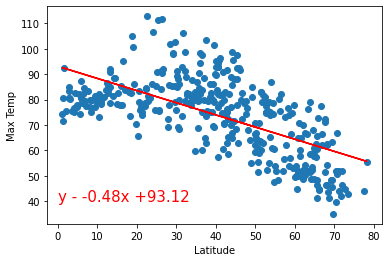

In [41]:
x_values = north_hemi_df["Lat"]
y_values = north_hemi_df["Max Tem"]
plot_linear_regression(x_values, y_values, 'Max Temp',(0,40))

# Southern Hemisphere - Max temps vs Latitude Linear Regression

The r-value is:0.6732214086017067


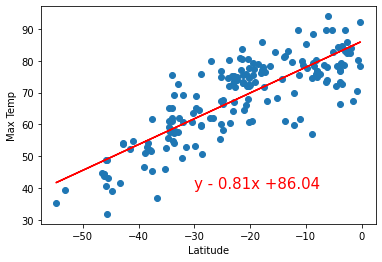

In [42]:
x_values = south_hemi_df["Lat"]
y_values = south_hemi_df["Max Tem"]
plot_linear_regression(x_values, y_values, 'Max Temp',(-30, 40))

# Northern Hemisphere - Humidity vs. Latitude Linear Regression

The r-value is:0.00037324174042667626


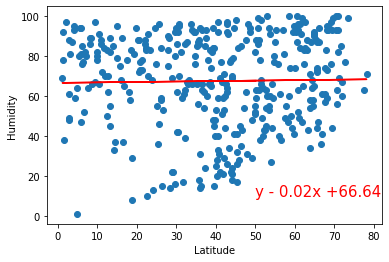

In [43]:
x_values = north_hemi_df["Lat"]
y_values = north_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(50,10))

# Southern Hemisphere - Humidity vs Latitude Linear Regression

The r-value is:0.029752164679570644


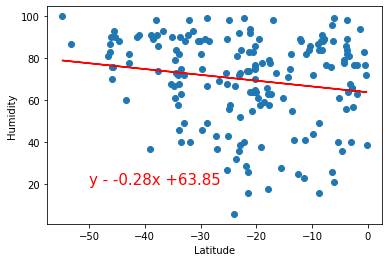

In [44]:
x_values = south_hemi_df["Lat"]
y_values = south_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(-50,20))

# Northern Hemisphere - Cloudiness vs Latitude Linear Regression

The r-value is:0.006490668325908887


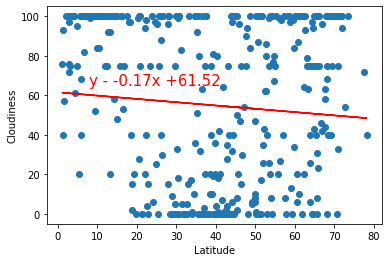

In [46]:
x_values = north_hemi_df["Lat"]
y_values = north_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness',(8,65))

# Southern Hemisphere - Cloudiness vs Latitude Linear Regression

The r-value is:0.005511895310471831


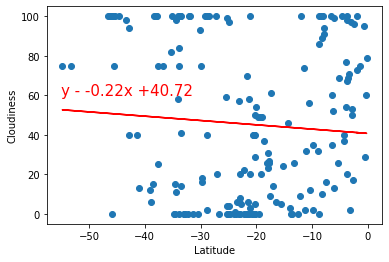

In [47]:
x_values = south_hemi_df["Lat"]
y_values = south_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness',(-55,60))

# Northern Hemisphere - Wind Speed vs Latitude Linear Regression

The r-value is:0.001596944222772263


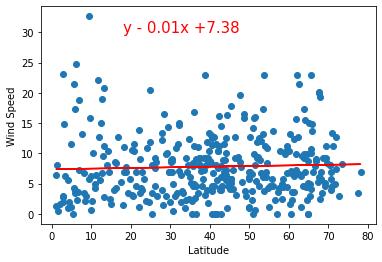

In [48]:
x_values = north_hemi_df["Lat"]
y_values = north_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed',(18,30))

# Southern Hemisphere - Wind Speed vs Latitude Linear Regression

The r-value is:5.486680279939011e-06


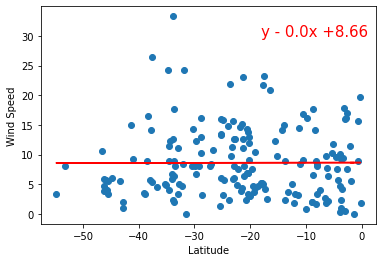

In [49]:
x_values = south_hemi_df["Lat"]
y_values = south_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed',(-18,30))